In [1]:
from ryPat import *
import seaborn as sb
sb.set_theme()

# 淺嚐 pandas
# 運用 yfinance 撈股票價格歷史資料

[*********************100%***********************]  2 of 2 completed


array([[<AxesSubplot:title={'center':'QQQ'}>,
        <AxesSubplot:title={'center':'SPY'}>]], dtype=object)

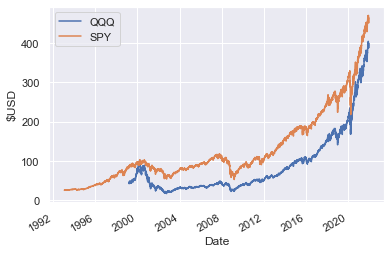

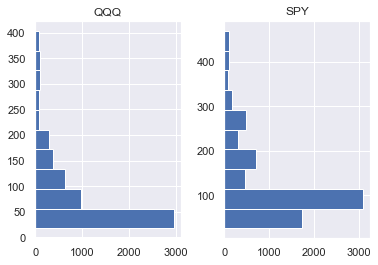

In [2]:
import pandas as pd
import yfinance as yf

# 選股票。
tk= yf.Tickers(['SPY', 'QQQ']) #, 'MSFT', 'AAPL', 'Googl'])
tk
# 撈1段期間的資料
tkHist= tk.history(period='max')

# 簡單作圖 X= X(t)
tkHist.Close.plot(ylabel='$USD')
#tkHist.Close.plot(logy= True, ylabel='$USD')

# Histogram
#tkHist.Close.hist()
tkHist.Close.hist(orientation= 'horizontal')

In [3]:
X= tkHist.Close.SPY
#X

In [4]:
#X.shape, X.index, X.values, X

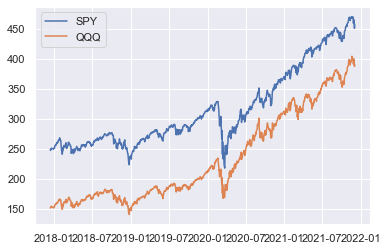

In [25]:

t= tkHist.Close.SPY[-1000:].index
X= tkHist.Close.SPY[-1000:]
Y= tkHist.Close.QQQ[-1000:]
pl.plot(t,X, label='SPY')
pl.plot(t,Y, label='QQQ')
pl.legend()


Text(0, 0.5, 'QQQ')

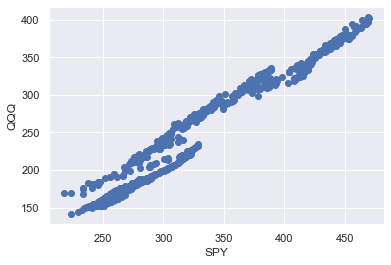

In [26]:
pl.scatter(X,Y)
pl.xlabel('SPY')
pl.ylabel('QQQ')

In [27]:
import statsmodels.api as sm

x1=  sm.add_constant(X) # adding a constant
x1

,const,SPY
Date,,
2017-12-13,1.0,248.489517
2017-12-14,1.0,247.474167
2017-12-15,1.0,249.534973
2017-12-18,1.0,251.117386
2017-12-19,1.0,250.152924
...,...,...
2021-11-26,1.0,458.970001
2021-11-29,1.0,464.600006
2021-11-30,1.0,455.559998


In [28]:
'''
The table is titled “OLS Regression Results.” 
OLS stands for Ordinary Least Squares 
and this is the most common method 
to estimate linear regression.
'''

lm= sm.OLS(Y,x1).fit()   # fitting the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    QQQ   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 2.871e+04
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:37:02   Log-Likelihood:                -4033.4
No. Observations:                1000   AIC:                             8071.
Df Residuals:                     998   BIC:                             8081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -119.4078      2.129    -56.089      0.000    -123.586    -115.230
SPY            1.1186      0.007    169.441      0.000       1.106       1.132
==============================================================================
Omnibus:                      104.423   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.558
Skew:                           0.856   Prob(JB):                     1.21e-28
Kurtosis:                       2.606   Cond. No.                     1.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

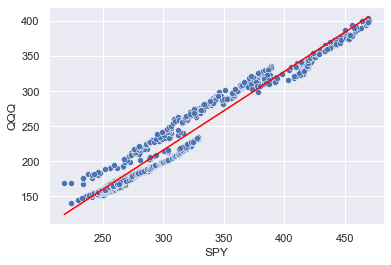

In [29]:
import seaborn as sns
import matplotlib.pyplot as pl

# plotting the data points
sns.scatterplot(x= X, y=Y)


# SPY coef: 1.1188
# Constant coef: -119.4727
# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏

slope= lm.params['SPY']
bias=  lm.params['const']

y_pred= slope * X + bias

#plotting the line
sns.lineplot(x=X, y= y_pred, color='red')

#axes
#pl.xlim(0)
#pl.ylim(0)
pl.show()

In [30]:
lm.params

const   -119.407841
SPY        1.118612
dtype: float64

In [31]:

from sklearn import linear_model
sklm= linear_model.LinearRegression()
sklm.fit(X.values.reshape(-1,1), 
         Y.values) # fitting the model

slope, bias= sklm.coef_, sklm.intercept_ 
slope, bias

(array([1.11861161]), -119.40784122235189)

In [32]:
# Linear Regression by Nomal Equation

#Φ= x1 # adding 1 as the zeroth column

# adding 1 as the zeroth column
N= X.values.size
Φ= np.concatenate((np.ones(N).reshape(N, 1),
                   X.values.reshape(N, 1)), 
                   axis=1)
y= Y.values

w= np.linalg.inv(Φ.T@Φ) @ Φ.T @ y

bias, slope= w
bias, slope

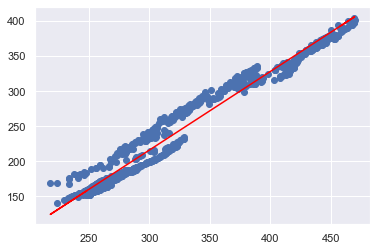

In [33]:
import matplotlib.pyplot as pl
import scipy.stats as st

'''
x= [5,7,8,7,2,17,2,9,4,11,12,9,6]
y= [99,86,87,88,111,86,103,87,94,78,77,85,86]
'''

x= X
y= Y
slope, intercept, r, p, std_err= st.linregress(x, y)

def pred(x):
    y= slope * x + intercept
    return y

mymodel= list(map(pred, x))

pl.scatter(x, y)
pl.plot(x, mymodel, color= 'red')
pl.show()

In [34]:
list(map(pred, [1,2,3,4]))

In [15]:
def f(x):
    y= x**2
    return y

list(map(f, [10]) )

<StemContainer object of 3 artists>

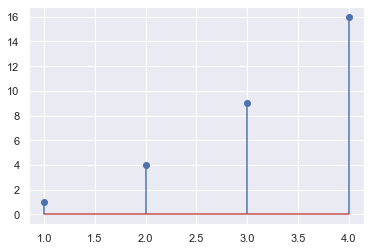

In [35]:
x= [1,2,3,4]
y= list(map(f, x))
y= [f(s) for s in x]
pl.stem(x, y)

In [37]:
t.shape, X.shape

In [38]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
import numpy as np
from sklearn.linear_model import LinearRegression



In [45]:
lr= LinearRegression()
lrFit= lr.fit(
        t.values.reshape(-1,1), 
        X.values)
lrFit.coef_, lrFit.intercept_

(array([1.63114236e-15]), -2254.8247602288207)

In [20]:
reg.coef_

array([1., 2.])

In [21]:
reg.intercept_

In [22]:
reg.predict(np.array([[3, 5]]))

array([16.])

In [46]:
import scipy.linalg as sla
sla.lstsq

<function scipy.linalg.basic.lstsq(a, b, cond=None, overwrite_a=False, overwrite_b=False, check_finite=True, lapack_driver=None)>